# KNN Regression from Scratch

### Group 4:

* Banzon, Beatrice
* Endozo, Angelo
* Ong, Charles

### TO DO:

    1. Exploratory data analysis and statistics
    2. Creation of the following functions
        a. KNN regression function
        b. Distance measure function: Euclidean and Minowski
        c. Accuracy check: MAPE and R^2
    3. Running of the regression model
    4. Accuracy checks on the regression model    model


In [1]:
# Package for reading xlsx files
!pip install openpyxl

import pandas as pd
import numpy as np
from seaborn import pairplot

# Exploratory data analysis and statistics

Combined Cycle Power Plant Dataset from https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant 

9568 entries every year from 2006-2011 on power plant performance

Features: 
* hourly average ambient variables Temperature (T) 1.81°C and 37.11°C
* Ambient Pressure (AP) 25.36-81.56 cm Hg
* Relative Humidity (RH) 892.89-1033.30 milibar
* Exhaust Vacuum (V) 25.56% to 100.16%

Target:
* to predict the net hourly electrical energy output (EP) 420.26-495.76 MW


In [2]:
#LOAD THE EXCEL FILE
raw_dataframe = pd.read_excel("CCPP/Folds5x2_pp.xlsx", sheet_name=None)
#COMBINE ALL SHEETS
dataframe = pd.concat((raw_dataframe['Sheet1'], 
           raw_dataframe['Sheet2'],
           raw_dataframe['Sheet3'],
           raw_dataframe['Sheet4'],
           raw_dataframe['Sheet5']
          ), ignore_index=True)

In [3]:
dataframe.tail()

,AT,V,AP,RH,PE
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93
47839,23.68,51.30,1011.86,71.24,451.67


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


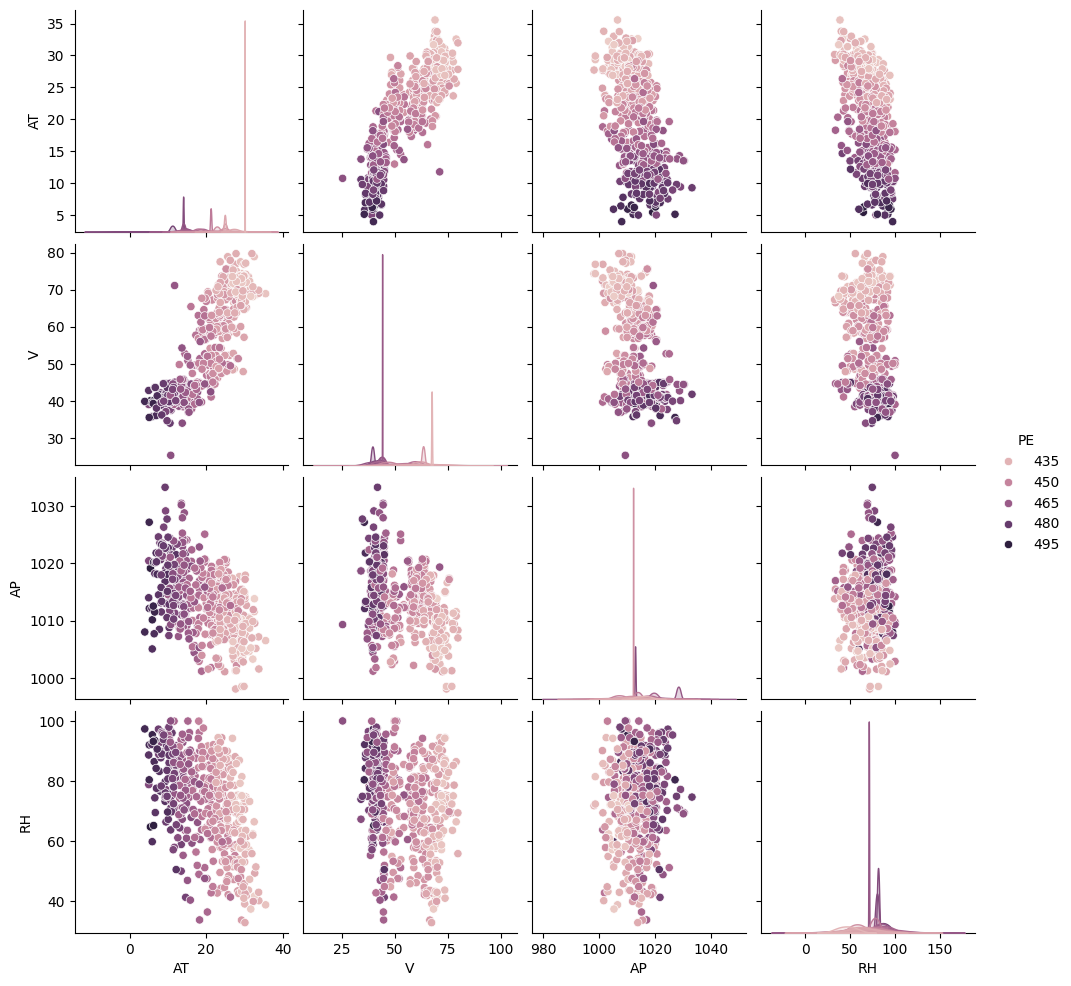

In [5]:
# LIMIT to just 500 samples for just a preview
pairplot(data=dataframe[:500], hue="PE", diag_kind='kde')

# Split Data

In [6]:
X = dataframe[['AT', 'V', 'AP', 'RH']]
y = dataframe['PE']

In [7]:
from sklearn.model_selection import train_test_split

#IF train_test_split not allowed, just split normally

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Distance measure function: Euclidean and Minowski


## Euclidean

__`data_Points`__ - List of all existing points<br>
__`cmp_Point`__ - Point to compare with<br>

returns `list` of distance between each data_Points and cmp_Point

In [8]:
def EuclideanDistance(data_Points : list[list], cmp_Point : list) -> list:
    DistanceFormula = lambda x : ((x - cmp_Point) ** 2).sum() ** (1/2);
    
    return list(map(DistanceFormula, data_Points))

## Minkowski

__`data_Points`__ - List of all existing points<br>
__`cmp_Point`__ - Point to compare with<br>
__`p`__ - Power controlling Manhattan (1) or Euclidean (2)

returns `list` of distance between each data_Points and cmp_Point

In [9]:
def MinkowskiDistance(data_Points : list[list], cmp_Point : list, p : int = 2) -> list:
    MinkowskiFormula = lambda x : (abs(x - cmp_Point) ** p).sum() ** (1/p)
    
    return list(map(MinkowskiFormula, data_Points))

In [21]:
#Test the Euclidean and Minkowski Distance
print(f'Euclidean\t: ', EuclideanDistance(data_Points= X_train.values[:5], cmp_Point= X_train.values[1]))
print(f'Minkowski(M)\t: ', MinkowskiDistance(data_Points= X_train.values[:5], cmp_Point= X_train.values[1], p=1))
print(f'Minkowski(E)\t: ', MinkowskiDistance(data_Points= X_train.values[:5], cmp_Point= X_train.values[1], p=2))

Euclidean	:  [29.039046127584843, 0.0, 25.623116516146112, 13.179411974743044, 4.029677406443351]
Minkowski(M)	:  [48.40000000000001, 0.0, 40.12999999999997, 20.730000000000082, 6.93000000000006]
Minkowski(E)	:  [29.039046127584843, 0.0, 25.623116516146112, 13.179411974743044, 4.029677406443351]


# Regression Function

__`X_predict`__: A single test point to predict for<br>
__`X_train`__: The training features<br>
__`y_train`__: The training labels<br>
__`k`__: Number of neighbours to select<br>
__`p`__: Select Manhattan/Euclidean distnace method

return `float` average of the closest neighbors' labels 

In [11]:
#DEBUG. PREDICTS FOR ONLY A SINGLE POINT
def KnnRegressionSinglePredict(X_predict: list,
                    X_train:list[list] = X_train.values, 
                    y_train:list = y_train.values,
                    k:int=3,  
                    p:int=2) -> float:


    
    # 1. Calculate the distance of the point to predict with all neighbors
    distances = MinkowskiDistance(data_Points=X_train, cmp_Point=X_predict, p=p)
    #print(f'Computed distances: ', distances)
    
    
    # 2. Get the indices of the closest neighbors
    indices = np.argsort(distances)[:k]
    #print(f'Closest are indices: ', indices)
    
    # 3. Get the average of all the neighbors 
    #print(y_train)
    #print(f'The closest labels are: ', y_train[indices])
    avg_Label = y_train[indices].mean()
    #print(f'The prediction is: ', avg_Labels)

    return avg_Label

In [12]:
#PREDICTS FOR ALL POINTS
def KnnRegression(X_predict: list[list],
                    X_train:list[list] = X_train.values, 
                    y_train:list = y_train.values,
                    k:int=3,  
                    p:int=2) -> float:

    return [KnnRegressionSinglePredict(X_predict=point, k=k, p=p) for point in X_predict]

```python
# DO NOT REMOVE. BACK UP IN CASE
k = 1
data_Points = X_train.values[:10]
testPoint = X_train.values[1]
p = 2


# 1. Calculate the distance of the point to predict with all neighbors
distances = MinkowskiDistance(data_Points=data_Points, cmp_Point=testPoint, p=p)
print(f'Computed distances: ', distances)


# 2. Get the indices of the closest neighbors
indices = np.argsort(distances)[:k]
print(f'Closest are indices: ', indices)

# 3. Get the average of all the neighbors 
print(y_train)
print(f'The closest labels are: ', y_train.values[indices])
avg_Labels = y_train.values[indices].mean()
print(f'The prediction is: ', avg_Labels)
```

### Check KnnRegression on Training and Single Test Points

In [13]:
print('The training prediction should result in selecting its own label from the dataset when k=1')
print(f'Known label: ',y_train.values[2], f'\t\t\tk1 Prediction', KnnRegressionSinglePredict(X_predict= X_train.values[2], k=1))
print(f'Known label: ',y_train.values[1], f'\t\t\tk1 Prediction', KnnRegressionSinglePredict(X_predict= X_train.values[1], k=1))
print(f'Known label: ',y_train.values[:3], f'\tk1 Prediction', KnnRegression(X_predict= X_train.values[:3], k=1))

print('\nThe training prediction should result in an average when k>1')
print(f'Known label: ',y_train.values[2], f'\t\t\tk3 Prediction', KnnRegressionSinglePredict(X_predict= X_train.values[2], k=3))
print(f'Known label: ',y_train.values[2], f'\t\t\tk8 Prediction', KnnRegressionSinglePredict(X_predict= X_train.values[2], k=8))
print(f'Known label: ',y_train.values[2], f'\t\t\tk15 Prediction', KnnRegressionSinglePredict(X_predict= X_train.values[2], k=15))

print('\nPredict for test cases')
print(f'Correct label: ',y_test.values[2], f'\t\t\tk3 Prediction', KnnRegressionSinglePredict(X_predict= X_test.values[2], k=3))
print(f'Correct label: ',y_test.values[5], f'\t\t\tk3 Prediction', KnnRegressionSinglePredict(X_predict= X_test.values[5], k=3))
print(f'Correct label: ',y_test.values[50], f'\t\t\tk3 Prediction', KnnRegressionSinglePredict(X_predict= X_test.values[50], k=3))
print(f'\nCorrect labels: ',y_test.values[:5], f'\nk5 Prediction', KnnRegression(X_predict= X_test.values[:5], k=5))

The training prediction should result in selecting its own label from the dataset when k=1
Known label:  465.51 			k1 Prediction 465.51
Known label:  446.91 			k1 Prediction 446.91
Known label:  [461.82 446.91 465.51] 	k1 Prediction [461.82, 446.91, 465.51]

The training prediction should result in an average when k>1
Known label:  465.51 			k3 Prediction 465.51
Known label:  465.51 			k8 Prediction 460.04999999999995
Known label:  465.51 			k15 Prediction 459.27066666666667

Predict for test cases
Correct label:  430.15 			k3 Prediction 430.1499999999999
Correct label:  431.69 			k3 Prediction 431.69
Correct label:  446.12 			k3 Prediction 446.12000000000006

Correct labels:  [467.08 443.88 430.15 442.93 443.09] 
k5 Prediction [467.06399999999996, 443.32, 430.10999999999996, 443.90599999999995, 443.226]


### Test prediction for 100 elements in Test Set

In [14]:
y_predict = KnnRegression(X_predict=X_test.values[:100], k=5)

# Acurracy Check Functions

## MAPE

`check_Labels` - The known correct values<br>
`check_Predictions` - The predicted values

In [15]:
def MAPE_Check(check_Labels: list, check_Predictions: list):
    # check_Labels = np.array([20, 31, 33, 38])
    # check_Predictions = np.array([25, 30, 29, 40])
    
    APE = abs((check_Labels - check_Predictions) / check_Labels) * 100
    
    # print(APE)
    print(f'Mean APE :\t', APE.mean())
    print(f'Median APE:\t', np.median(APE))

In [16]:
MAPE_Check(check_Labels = y_test.values[:len(y_predict)], check_Predictions= y_predict)

Mean APE :	 0.2198648364943348
Median APE:	 0.12161696767196409


## R^2 

# Actual Run

In [17]:
# LIMIT THE SIZE IF TOO LARGE
limit = 500

# GET THE PREDICTIONS
y_predict = KnnRegression(X_predict = X_test.values[:limit], k=5)

#CHECK THE MAPE ERROR RATE
MAPE_Check(check_Labels = y_test.values[:len(y_predict)], check_Predictions= y_predict)

Mean APE :	 0.2521167963688463
Median APE:	 0.14793707884977794
